# Arsal Ali
## Final Exam

## Loading the Dataset

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\arsal\.cache\kagglehub\datasets\alexteboul\diabetes-health-indicators-dataset\versions\1


# Training and Cleaning

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

df = pd.read_csv('dataset.csv')

df.fillna(df.median(), inplace=True)
categorical_cols = ['Sex', 'Smoker']
df[categorical_cols] = df[categorical_cols].astype('category').apply(lambda x: x.cat.codes)

X = df.drop(['Diabetes_binary', 'HeartDiseaseorAttack'], axis=1)
y_diabetes = df['Diabetes_binary']
y_heart = df['HeartDiseaseorAttack']

X_train, X_test, y_train_dia, y_test_dia = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)
_, _, y_train_heart, y_test_heart = train_test_split(X, y_heart, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train_dia)

joblib.dump(model, 'healthcare_model.pkl')

y_pred = model.predict(X_test)
print(classification_report(y_test_dia, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      7090
         1.0       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



## EDA

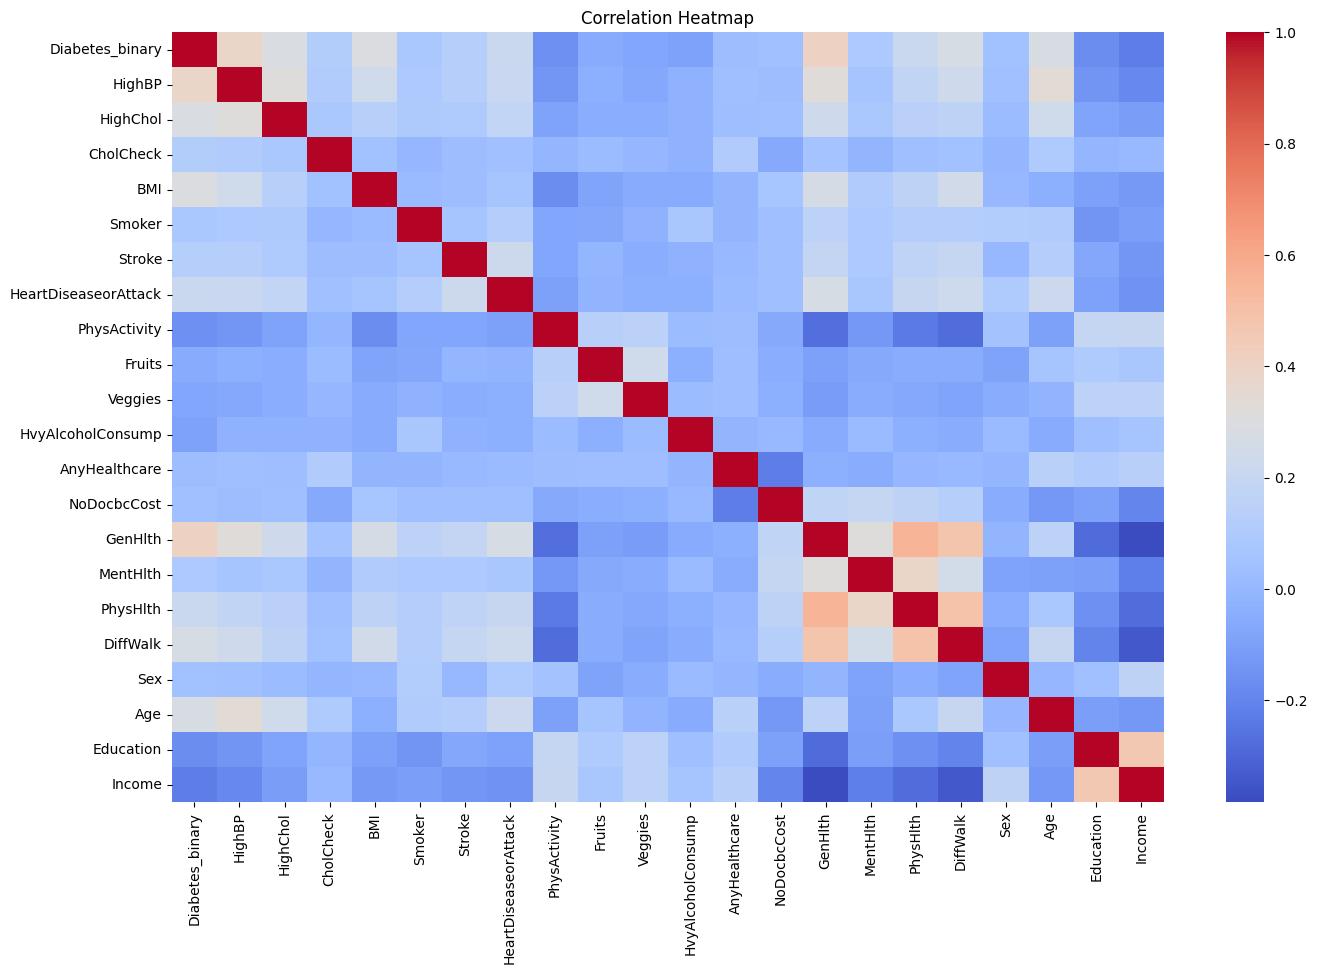

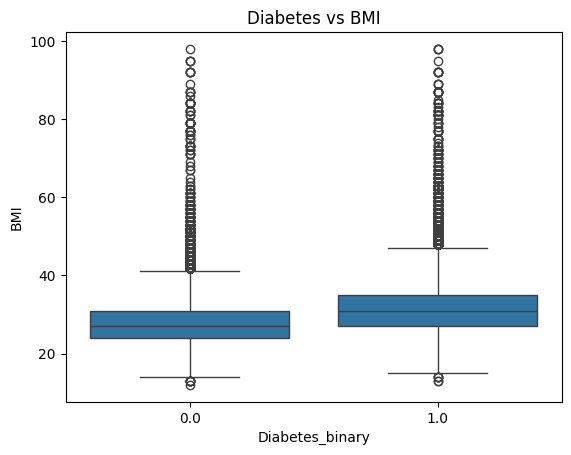

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')

plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

sns.boxplot(x='Diabetes_binary', y='BMI', data=df)
plt.title('Diabetes vs BMI')
plt.show()

## Feature Enginering

In [11]:
df = pd.read_csv('dataset.csv')

important_features = ['HighBP', 'BMI', 'Smoker', 'PhysActivity', 'Age']

X = df[important_features]
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

joblib.dump(model, 'healthcare_small_model.pkl')

['healthcare_small_model.pkl']